### Importing Essential Libaries 

In [3]:
import pandas as pd

### Reading From csv file 

In [4]:
df = pd.read_csv('../data/Walmart.csv')

### Exploratory Data Analysis on Data

In [5]:
print("Shape of the DataFrame: ", df.shape)
print("Columns of the DataFrame: ", df.columns.tolist())

Shape of the DataFrame:  (6435, 8)
Columns of the DataFrame:  ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


In [6]:
print("First 5 rows of the DataFrame:")
print(df.head())

First 5 rows of the DataFrame:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


### Checking for Null Values

In [9]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [15]:
df.columns = df.columns.str.lower()

### Visualize sales over time

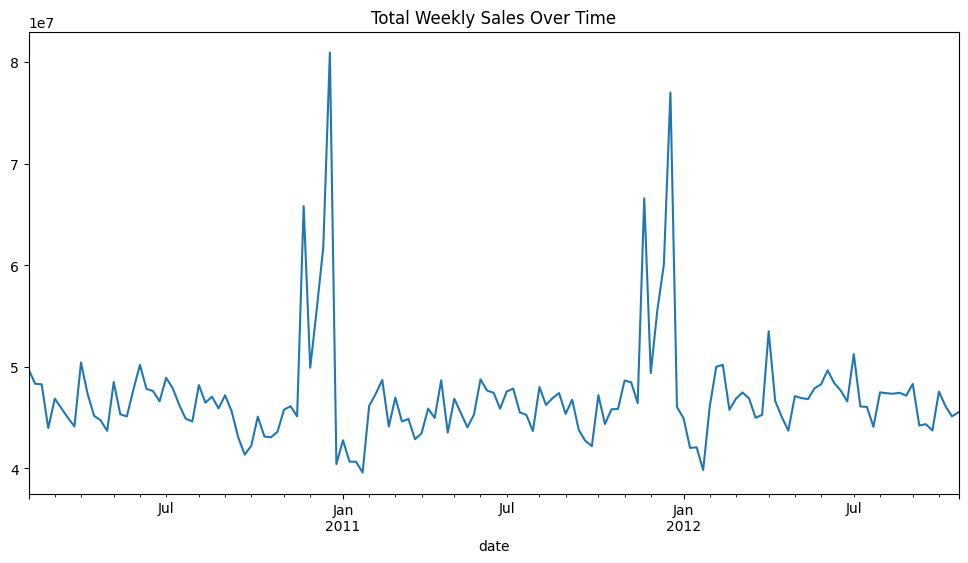

In [17]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

df.groupby('date')['weekly_sales'].sum().plot(figsize=(12,6))
plt.title("Total Weekly Sales Over Time")
plt.show()


### Explore distributions

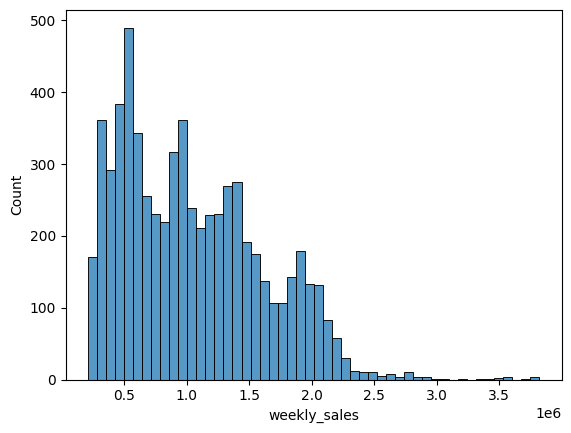

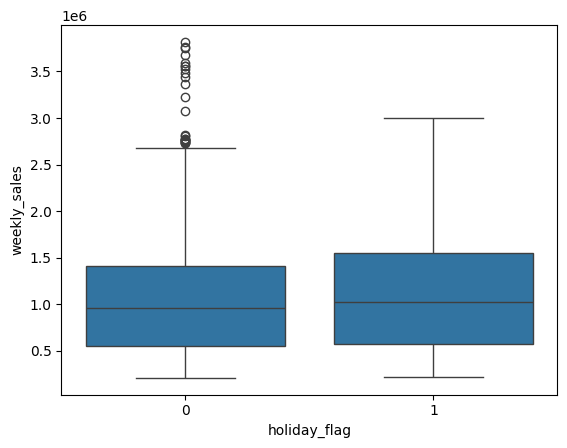

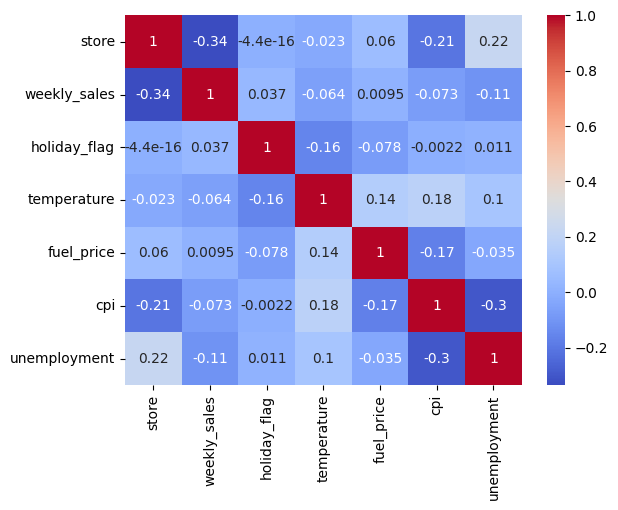

In [20]:
import seaborn as sns

sns.histplot(df['weekly_sales'], bins=50)
plt.show()

sns.boxplot(x='holiday_flag', y='weekly_sales', data=df)
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


### A quick baseline forecast

Baseline = last week’s sales = prediction for next week

In [22]:
df = df.sort_values(['store','date'])
df['lag_1'] = df.groupby('store')['weekly_sales'].shift(1)

# Drop NA
baseline = df.dropna(subset=['lag_1'])

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(baseline['weekly_sales'], baseline['lag_1'])
print("Baseline MAE:", mae)


Baseline MAE: 84935.43792957744
